In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler


##  SMOTE (Synthetic Minority Oversampling Technique) 

In [2]:
df= pd.read_csv('Heart Disease Data 2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## splite data

In [3]:
df.drop(['Income',"Education",'DiffWalk',"NoDocbcCost","AnyHealthcare",'Veggies',"Fruits","CholCheck"],axis=1,inplace=True)
df.shape
df['HeartDiseaseorAttack'].value_counts()


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [4]:
x = df.drop(["HeartDiseaseorAttack"] , axis = 1).values
y = df["HeartDiseaseorAttack"].values

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
sm = SMOTE(random_state = 42)
x_smote, y_smote= sm.fit_resample(x, y)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)


In [7]:
scaler = MinMaxScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

## Random forest

In [8]:


# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train2, y_train2)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train1 = best_rf.predict(x_train2)
ypred_test1 = best_rf.predict(x_test2)

print("Training Results\n")
print(classification_report(y_train2, ypred_train1))
print("Test Results\n")
print(classification_report(y_test2, ypred_test1))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test2, ypred_test1)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(best_rf, x_train2, y_train2, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}
Training Results

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    172233
         1.0       0.97      0.95      0.96    172447

    accuracy                           0.96    344680
   macro avg       0.96      0.96      0.96    344680
weighted avg       0.96      0.96      0.96    344680

Test Results

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     57554
         1.0       0.95      0.92      0.93     57340

    accuracy                           0.93    114894
   macro avg       0.93      0.93      0.93    114894
weighted avg       0.93      0.93      0.93    114894

Confusion Matrix:
 [[54696  2858]
 [ 4757 52583]]
Cross-validation scores: [0.93122606 0.93237206 0.93122606 0.93008007 0.93039921]
Average cross-validation score: 0.9310606939770223

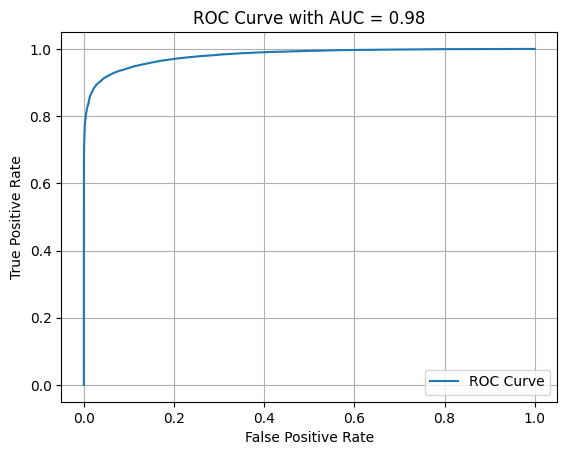

In [9]:

y_proba_test = best_rf.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [10]:


# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train2, y_train2)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train2, y_train2)

ypred_train2 = best_tree.predict(x_train2)
ypred_test2 = best_tree.predict(x_test2)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train2, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test2, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train2, y_train2, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Najlepsza dokładność: 0.9149733085760706
Training Results

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96    172233
         1.0       0.98      0.94      0.96    172447

    accuracy                           0.96    344680
   macro avg       0.96      0.96      0.96    344680
weighted avg       0.96      0.96      0.96    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     57554
         1.0       0.93      0.90      0.92     57340

    accuracy                           0.92    114894
   macro avg       0.92      0.92      0.92    114894
weighted avg       0.92      0.92      0.92    114894

Cross-Validation Scores for the Best Model: [0.91554485 0.9156609  0.91464547 0.91555936 0.91347047]
Average Cross-Validation Score: 0.9149762098178021


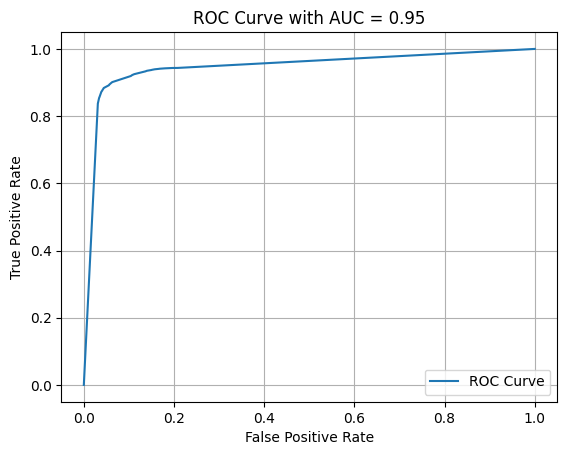

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = best_tree.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [12]:
Gnb = GaussianNB()
Gnb.fit(x_train2, y_train2)
ypred_train3 = Gnb.predict(x_train2)
y_pred_test3 = Gnb.predict(x_test2)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test2, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.746488067261998


In [13]:
print("Training Results\n")
print(classification_report(y_train2, ypred_train3))

Training Results

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75    172233
         1.0       0.76      0.72      0.74    172447

    accuracy                           0.75    344680
   macro avg       0.75      0.75      0.75    344680
weighted avg       0.75      0.75      0.75    344680



In [14]:
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75     57554
         1.0       0.76      0.72      0.74     57340

    accuracy                           0.75    114894
   macro avg       0.75      0.75      0.75    114894
weighted avg       0.75      0.75      0.75    114894



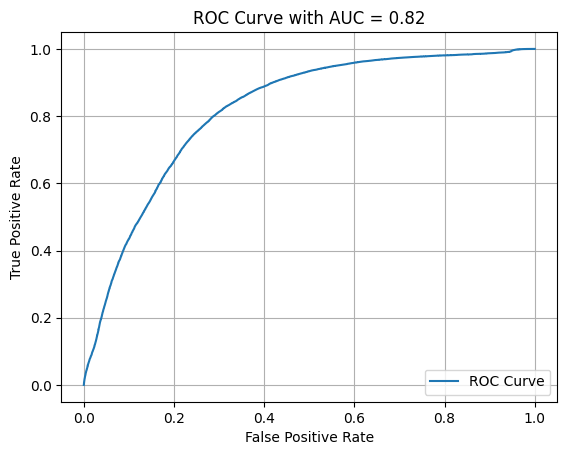

In [15]:

y_proba_test = Gnb.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Najlepsze parametry:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy on Training set:  0.9283683416502263
Accuracy on Test set:  0.923094330426306

Training Results

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93    172233
         1.0       0.96      0.89      0.93    172447

    accuracy                           0.93    344680
   macro avg       0.93      0.93      0.93    344680
weighted avg       0.93      0.93      0.93    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     57554
         1.0       0.96      0.89      0.92     57340

    accuracy                           0.92    114894
   macro avg       0.93      0.92      0.92    114894
weighted avg       0.93      0.92      0.92    114894



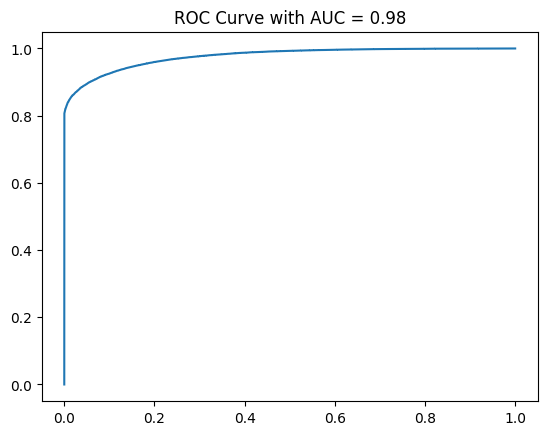

In [16]:


# Inicjalizacja modelu XGBoost
xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train2, y_train2)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train2)
y_pred_test4 = best_xg.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test4)))
plt.show()

## logistic regression

Najlepsze parametry:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Training set:  0.7776401299756296
Accuracy on Test set:  0.7776559263320975

Training Results

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77    172233
         1.0       0.76      0.81      0.78    172447

    accuracy                           0.78    344680
   macro avg       0.78      0.78      0.78    344680
weighted avg       0.78      0.78      0.78    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77     57554
         1.0       0.76      0.81      0.78     57340

    accuracy                           0.78    114894
   macro avg       0.78      0.78      0.78    114894
weighted avg       0.78      0.78      0.78    114894



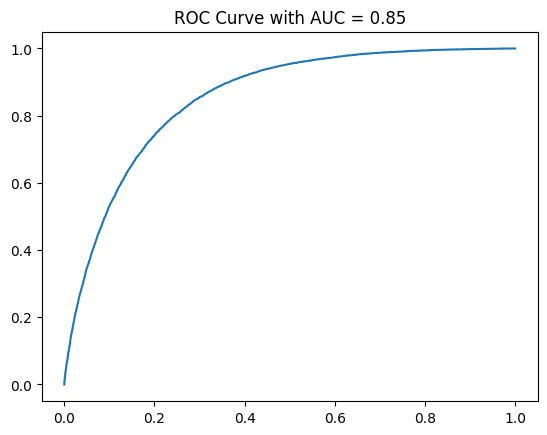

In [17]:


# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train2, y_train2)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train2)
y_pred_test4 = best_lg.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test2 ,y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

In [23]:
params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

gb_clf = GradientBoostingClassifier(
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_leaf=params['min_samples_leaf'],
    min_samples_split=params['min_samples_split'],
    n_estimators=params['n_estimators'])
gb_clf.fit(x_train2, y_train2)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=300)

Accuracy on Training set:  0.9414239294418011
Accuracy on Test set:  0.9311452295159016

Training Results

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    172233
         1.0       0.97      0.91      0.94    172447

    accuracy                           0.94    344680
   macro avg       0.94      0.94      0.94    344680
weighted avg       0.94      0.94      0.94    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     57554
         1.0       0.96      0.90      0.93     57340

    accuracy                           0.93    114894
   macro avg       0.93      0.93      0.93    114894
weighted avg       0.93      0.93      0.93    114894



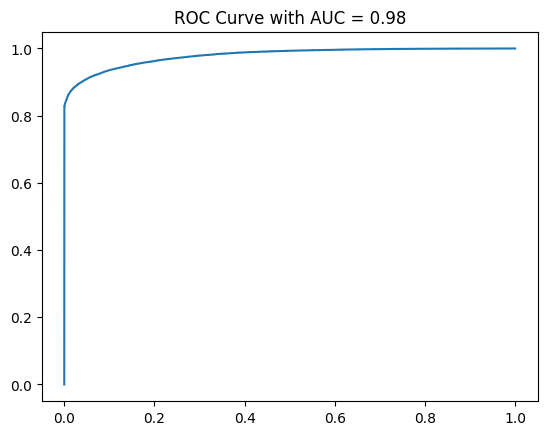

In [24]:


# Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train2, y_train2)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_


# Predykcje na zbiorze treningowym i testowym
ypred_train6 = gb_clf.predict(x_train2)
y_pred_test6 = gb_clf.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test6))

# Krzywa ROC
y_proba_test6 = gb_clf.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test6)))
plt.show()

## KNN

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train2, y_train2)


KNeighborsClassifier()

In [26]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [27]:
grid_cv.fit(x_train2, 
            y_train2)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [28]:
grid_cv.best_score_


0.8995560560143062

In [29]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [30]:
ypred_train33 = grid_cv.predict(x_train2)
y_pred_test33 = grid_cv.predict(x_test2)
print("XGBClassifier Accuracy: ",accuracy_score(y_test2, y_pred_test33))

XGBClassifier Accuracy:  0.9086897488119484


In [31]:
print("Training Results\n")
print(classification_report(y_train2, ypred_train33))

Training Results

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    172233
         1.0       0.97      0.97      0.97    172447

    accuracy                           0.97    344680
   macro avg       0.97      0.97      0.97    344680
weighted avg       0.97      0.97      0.97    344680



In [32]:
print("Training Results\n")
print(classification_report(y_test2, y_pred_test33))

Training Results

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     57554
         1.0       0.91      0.91      0.91     57340

    accuracy                           0.91    114894
   macro avg       0.91      0.91      0.91    114894
weighted avg       0.91      0.91      0.91    114894



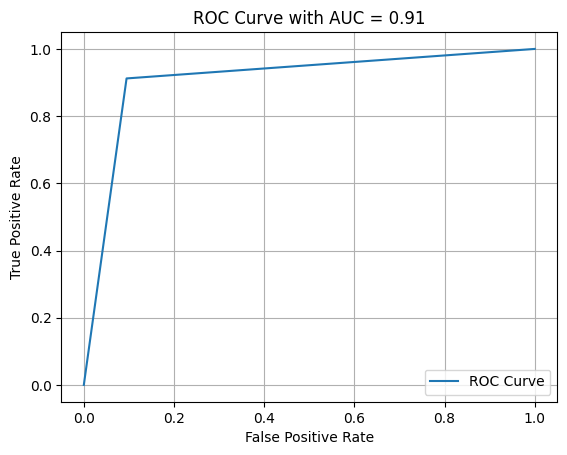

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = grid_cv.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

## inne próby sieci neuronowych 

In [35]:



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train2,y_train2,epochs = 10)

Epoch 1/10



10772/10772 [==============================] - 22s 2ms/step - loss: 0.4391 - accuracy: 0.7978
Epoch 2/10
10772/10772 [==============================] - 21s 2ms/step - loss: 0.3731 - accuracy: 0.8282
Epoch 3/10
10772/10772 [==============================] - 21s 2ms/step - loss: 0.3478 - accuracy: 0.8392
Epoch 4/10
10772/10772 [==============================] - 20s 2ms/step - loss: 0.3344 - accuracy: 0.8451
Epoch 5/10
10772/10772 [==============================] - 21s 2ms/step - loss: 0.3276 - accuracy: 0.8485
Epoch 6/10
10772/10772 [==============================] - 21s 2ms/step - loss: 0.3230 - accuracy: 0.8494
Epoch 7/10
10772/10772 [==============================] - 28s 3ms/step - loss: 0.3202 - accuracy: 0.8504
Epoch 8/10
10772/10772 [==============================] - 26s 2ms/step - loss: 0.3186 - accuracy: 0.8520
Epoch 9/10
10772/10772 [==============================] - 25s 2ms/step - loss: 0.3171 - accuracy: 0.8519
Epoch 10/10
10772/10772 [==============================] - 25s 2ms

In [36]:
model_2.evaluate(x_test2,y_test2)

3591/3591 [==============================] - 8s 2ms/step - loss: 0.3141 - accuracy: 0.8547


[0.31405386328697205, 0.8546834588050842]

In [37]:
ypred_train7 = model_2.predict(x_train2)
y_pred_test7 = model_2.predict(x_test2)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)

print(classification_report(y_train2,ypred_train7))
print(classification_report(y_test2,y_pred_test7))

3591/3591 [==============================] - 7s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86    172233
         1.0       0.88      0.83      0.85    172447

    accuracy                           0.86    344680
   macro avg       0.86      0.86      0.86    344680
weighted avg       0.86      0.86      0.86    344680

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86     57554
         1.0       0.88      0.82      0.85     57340

    accuracy                           0.85    114894
   macro avg       0.86      0.85      0.85    114894
weighted avg       0.86      0.85      0.85    114894



3591/3591 [==============================] - 7s 2ms/step


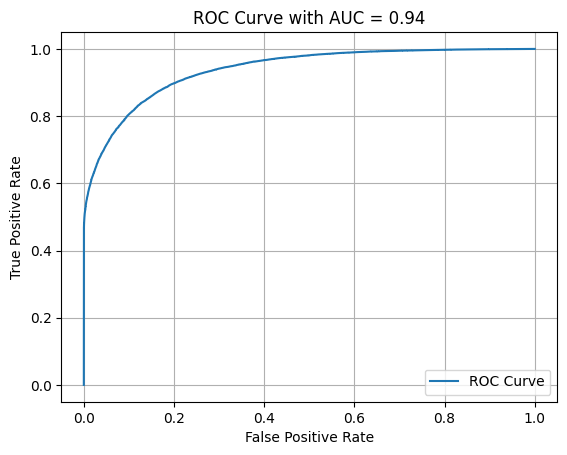

In [38]:

y_proba_test = model_2.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [39]:

tf.random.set_seed(42)


model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(36,activation = 'relu'),
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train2,y_train2,epochs = 100)

Epoch 1/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4195 - accuracy: 0.8081
Epoch 2/100
10772/10772 [==============================] - 25s 2ms/step - loss: 0.3415 - accuracy: 0.8409
Epoch 3/100
10772/10772 [==============================] - 25s 2ms/step - loss: 0.3236 - accuracy: 0.8473
Epoch 4/100
10772/10772 [==============================] - 26s 2ms/step - loss: 0.3139 - accuracy: 0.8512
Epoch 5/100
10772/10772 [==============================] - 26s 2ms/step - loss: 0.3087 - accuracy: 0.8537
Epoch 6/100
10772/10772 [==============================] - 26s 2ms/step - loss: 0.3053 - accuracy: 0.8559
Epoch 7/100
10772/10772 [==============================] - 21s 2ms/step - loss: 0.3018 - accuracy: 0.8575
Epoch 8/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.2987 - accuracy: 0.8595
Epoch 9/100
10772/10772 [==============================] - 15s 1ms/step - loss: 0.2952 - accuracy: 0.8608
Epoch 10/100
10772/10772 [====================

In [40]:
model_22.evaluate(x_test2,y_test2)

3591/3591 [==============================] - 4s 1ms/step - loss: 0.2742 - accuracy: 0.8702


[0.2741550803184509, 0.8702282309532166]

In [41]:
ypred_train9 = model_22.predict(x_train2)
y_pred_test9 = model_22.predict(x_test2)

y_pred_test9 = (y_pred_test9 > 0.5)
ypred_train9 = (ypred_train9 > 0.5)

print(classification_report(y_train2,ypred_train9))
print(classification_report(y_test2,y_pred_test9))

3591/3591 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87    172233
         1.0       0.89      0.85      0.87    172447

    accuracy                           0.87    344680
   macro avg       0.87      0.87      0.87    344680
weighted avg       0.87      0.87      0.87    344680

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     57554
         1.0       0.89      0.85      0.87     57340

    accuracy                           0.87    114894
   macro avg       0.87      0.87      0.87    114894
weighted avg       0.87      0.87      0.87    114894



   1/3591 [..............................] - ETA: 1:32

3591/3591 [==============================] - 4s 1ms/step


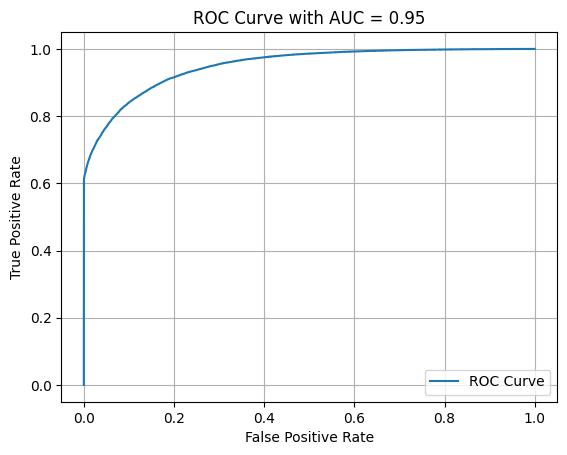

In [42]:
import matplotlib.pyplot as plt

y_proba_test = model_22.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [43]:
model1 = Sequential()
model1.add(Dense(units=14,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=28,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
model1.fit(x=x_train2, 
          y=y_train2, 
          epochs=100,
          validation_data=(x_test2, y_test2), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10772/10772 [==============================] - 20s 2ms/step - loss: 0.5201 - val_loss: 0.4692
Epoch 2/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4902 - val_loss: 0.4607
Epoch 3/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4849 - val_loss: 0.4618
Epoch 4/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4826 - val_loss: 0.4550
Epoch 5/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4821 - val_loss: 0.4534
Epoch 6/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4821 - val_loss: 0.4582
Epoch 7/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4802 - val_loss: 0.4585
Epoch 8/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4804 - val_loss: 0.4539
Epoch 9/100
10772/10772 [==============================] - 19s 2ms/step - loss: 0.4802 - val_loss: 0.4596
Epoch 10/100
10772/10772 [====================

In [45]:
ypred_train10 = model1.predict(x_train2)
y_pred_test10 = model1.predict(x_test2)

y_pred_test10 = (y_pred_test10 > 0.5)
ypred_train10 = (ypred_train10 > 0.5)




3591/3591 [==============================] - 5s 1ms/step


In [46]:
print('trening Results\n')
print(classification_report(y_train2,ypred_train10))

trening Results

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79    172233
         1.0       0.78      0.83      0.81    172447

    accuracy                           0.80    344680
   macro avg       0.80      0.80      0.80    344680
weighted avg       0.80      0.80      0.80    344680



In [47]:
print('Testing Results\n')
print(classification_report(y_test2,y_pred_test10))

Testing Results

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79     57554
         1.0       0.78      0.83      0.81     57340

    accuracy                           0.80    114894
   macro avg       0.80      0.80      0.80    114894
weighted avg       0.80      0.80      0.80    114894



3591/3591 [==============================] - 5s 1ms/step


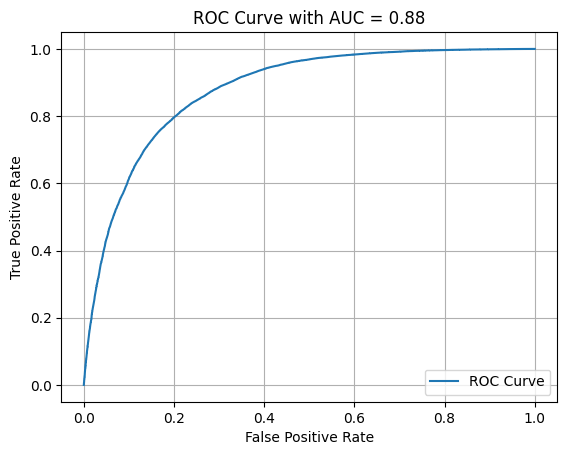

In [48]:
import matplotlib.pyplot as plt

y_proba_test = model1.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [49]:
model2 = Sequential()


model2.add(Dense(14,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model2.fit(x=x_train2, 
          y=y_train2, 
          epochs=100,
          validation_data=(x_test2, y_test2), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4904 - val_loss: 0.4444
Epoch 2/100
10772/10772 [==============================] - 26s 2ms/step - loss: 0.4576 - val_loss: 0.4293
Epoch 3/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4476 - val_loss: 0.4165
Epoch 4/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4435 - val_loss: 0.4156
Epoch 5/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4410 - val_loss: 0.4087
Epoch 6/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4401 - val_loss: 0.4111
Epoch 7/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4387 - val_loss: 0.4089
Epoch 8/100
10772/10772 [==============================] - 27s 2ms/step - loss: 0.4387 - val_loss: 0.4094
Epoch 9/100
10772/10772 [==============================] - 28s 3ms/step - loss: 0.4378 - val_loss: 0.4095
Epoch 10/100
10772/10772 [====================

In [51]:
ypred_train11 = model2.predict(x_train2)
y_pred_test11 = model2.predict(x_test2)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train2,ypred_train11))
print(classification_report(y_test2,y_pred_test11))

3591/3591 [==============================] - 5s 1ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83    172233
         1.0       0.82      0.83      0.83    172447

    accuracy                           0.83    344680
   macro avg       0.83      0.83      0.83    344680
weighted avg       0.83      0.83      0.83    344680

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82     57554
         1.0       0.82      0.83      0.83     57340

    accuracy                           0.83    114894
   macro avg       0.83      0.83      0.83    114894
weighted avg       0.83      0.83      0.83    114894



3591/3591 [==============================] - 5s 1ms/step


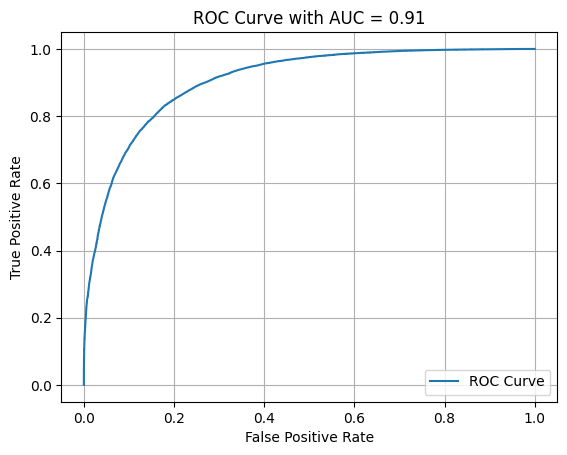

In [52]:
import matplotlib.pyplot as plt

y_proba_test = model2.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

Training Results

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85    172233
         1.0       0.86      0.85      0.85    172447

    accuracy                           0.85    344680
   macro avg       0.85      0.85      0.85    344680
weighted avg       0.85      0.85      0.85    344680

Testing Results

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     57554
         1.0       0.86      0.85      0.85     57340

    accuracy                           0.85    114894
   macro avg       0.85      0.85      0.85    114894
weighted avg       0.85      0.85      0.85    114894



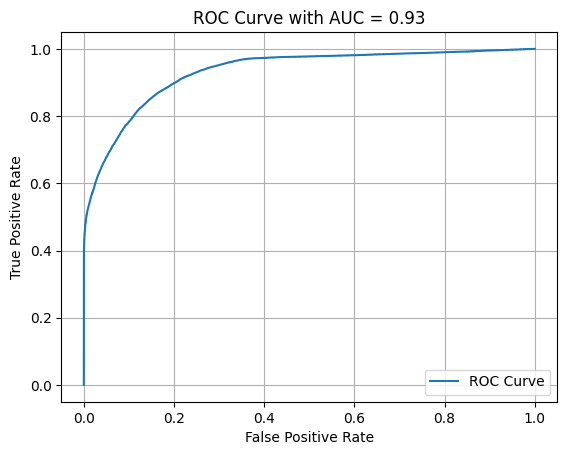

In [63]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train2, y_train2)

ypred_train14 = model3.predict(x_train2)
y_pred_test14 = model3.predict(x_test2)

print("Training Results\n")
print(classification_report(y_train2, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test2, y_pred_test14))

y_proba_test = model3.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [53]:
# model3 = SVC(probability=True)

In [54]:
# model3.fit(x_train2,y_train2)

In [55]:
# ypred_train12 = model3.predict(x_train2)
# y_pred_test12 = model3.predict(x_test2)


# print(classification_report(y_train2,ypred_train12))
# print(classification_report(y_test2,y_pred_test12))

In [56]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [57]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [58]:
# grid.fit(x_train2,y_train2)

In [59]:
# grid.best_params_

In [60]:
# grid.best_estimator_

In [61]:
# ypred_train = grid.predict(x_train2)
# y_pred_test = grid.predict(x_test2)


# print(classification_report(y_train2,ypred_train))
# print(classification_report(y_test2,y_pred_test))

In [62]:


# y_proba_test = grid.predict_proba(x_test2)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()